<a href="https://colab.research.google.com/github/ChinyangaTL/cse301_project_intelligent_systems/blob/main/CSE_301_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers.core import Dense, Dropout

# Importing the Data and Data Cleaning

In [ ]:
df = pd.read_csv('CSEdata.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
print("The dataset has", df.shape[0],"rows and", df.shape[1],"columns")

The dataset has 252000 rows and 13 columns


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
# Check for null values
nulval = df.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum()) * 100).round(2)
nulval

,absolute,percent
Id,0,NaN
Income,0,NaN
Age,0,NaN
Experience,0,NaN
Married/Single,0,NaN
House_Ownership,0,NaN
Car_Ownership,0,NaN
Profession,0,NaN
CITY,0,NaN
STATE,0,NaN


In [ ]:
# Check if there are duplicate entries in the data
df.duplicated().sum()

0

In [ ]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


# Exploratory Data Analysis

In [ ]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [ ]:
# Rename Married/Single to Marital_Status
df.rename(columns = {'Married/Single':'Marital_Status'}, inplace=True)
df.head()

,Id,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
# Store categorical and continuous values
categorical_val = []
continuous_val = []
for column in df.columns:
  print("========================")
  print(f"{column} : {df[column].unique()}")
  if (len(df[column].unique()) <= 10):
    categorical_val.append(column)
  else:
    continuous_val.append(column)

Id : [     1      2      3 ... 251998 251999 252000]
Income : [1303834 7574516 3991815 ... 2843572 4522448 9070230]
Age : [23 40 66 41 47 64 58 33 24 78 22 28 57 48 39 71 56 54 50 72 36 76 38 31
 52 59 21 26 55 45 77 63 30 25 73 75 27 74 67 46 68 79 42 60 32 65 49 35
 61 29 37 69 62 53 70 34 43 44 51]
Experience : [ 3 10  4  2 11  0 14 17 12  7  9  6  8  1 13 19 15 20  5 16 18]
Marital_Status : ['single' 'married']
House_Ownership : ['rented' 'norent_noown' 'owned']
Car_Ownership : ['no' 'yes']
Profession : ['Mechanical_engineer' 'Software_Developer' 'Technical_writer'
 'Civil_servant' 'Librarian' 'Economist' 'Flight_attendant' 'Architect'
 'Designer' 'Physician' 'Financial_Analyst' 'Air_traffic_controller'
 'Politician' 'Police_officer' 'Artist' 'Surveyor' 'Design_Engineer'
 'Chemical_engineer' 'Hotel_Manager' 'Dentist' 'Comedian'
 'Biomedical_Engineer' 'Graphic_Designer' 'Computer_hardware_engineer'
 'Petroleum_Engineer' 'Secretary' 'Computer_operator'
 'Chartered_Accountant' 'Techni

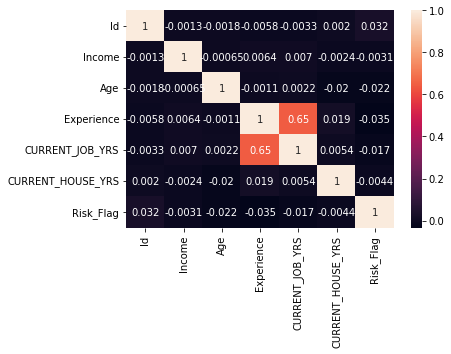

In [ ]:
# Check the correlation between the columns
sns.heatmap(df.corr(), annot=True)

### Effect of marital status on Risk Flag

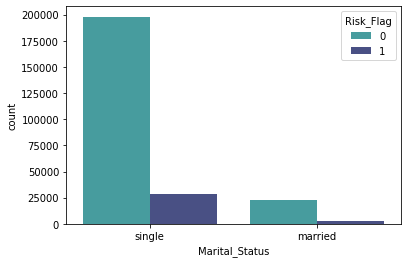

In [ ]:
sns.countplot(data=df, x='Marital_Status', hue='Risk_Flag', palette="mako_r")

### Effect of house ownership on Risk Flag

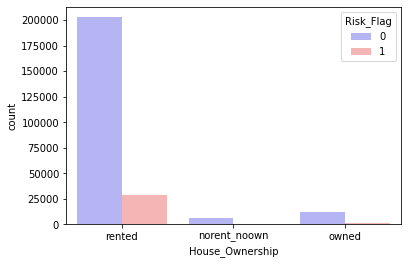

In [ ]:
sns.countplot(data=df, x='House_Ownership', hue='Risk_Flag', palette="bwr")

### Effect of car ownership on Risk Flag

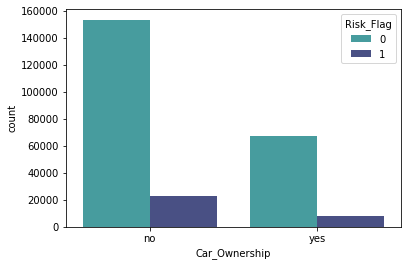

In [ ]:
sns.countplot(data=df, x='Car_Ownership', hue='Risk_Flag', palette="mako_r")

### Effect of Profession on Risk Flag

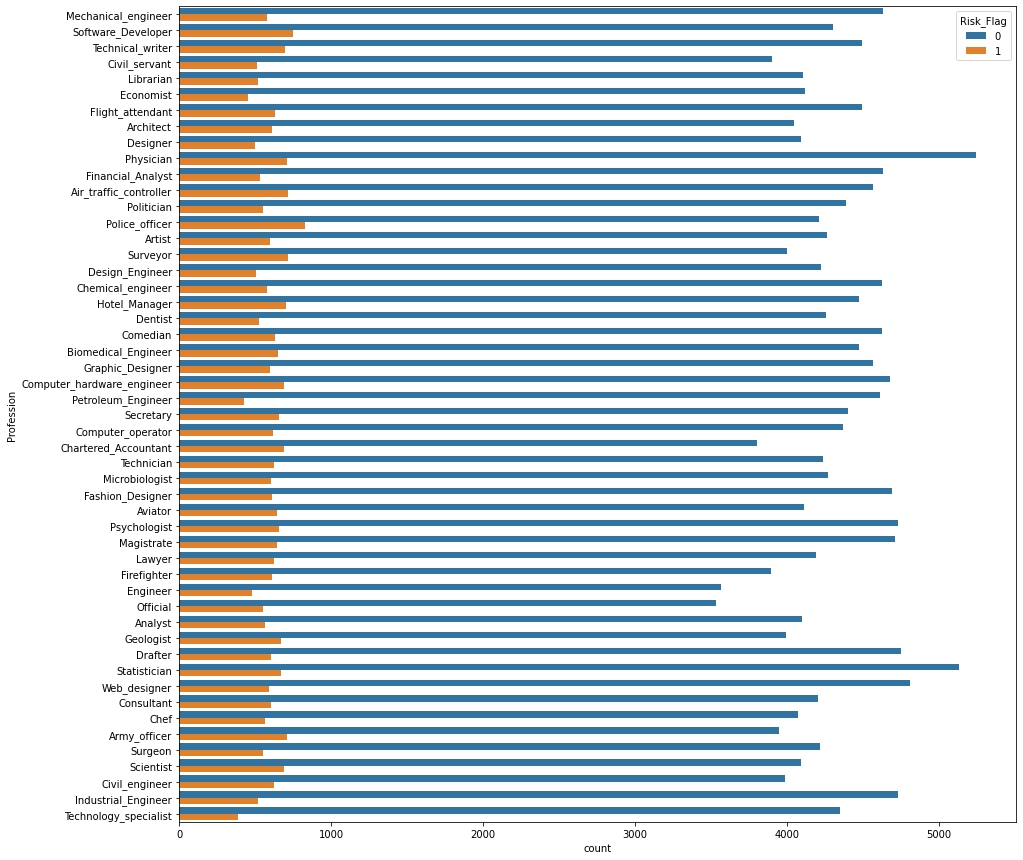

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(data= df, y= 'Profession', hue='Risk_Flag')

### Check for Outliers

An outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a dataset. 

They are extreme values that stand out greatly from the overall pattern of values in a data i.e. its data that lies outside the other values in the dataset

It is important to check for outliers since they can give helpful insights into the data. Outliers can have an effect on the statistical results of the model. 

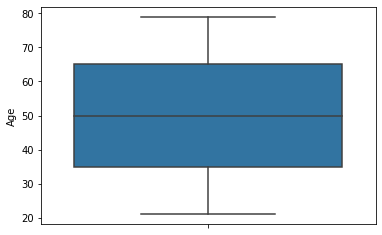

In [ ]:
sns.boxplot(y='Age', data=df)

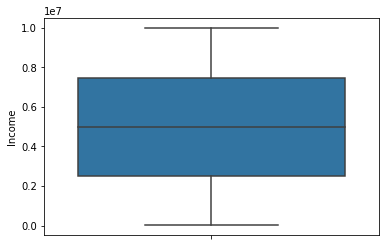

In [ ]:
sns.boxplot(y='Income', data=df)

([<matplotlib.patches.Wedge at 0x7fa3cb1d1f10>,
 [Text(-1.5839143821108173, 0.6444495559332072, 'Non-Defaulter'),
  Text(1.620964964620271, -0.6595245131711206, 'Defaulter')],
 [Text(-0.8892150917113358, 0.36179624192741444, '87.7%'),
  Text(0.9262656940687262, -0.37687115038349744, '12.3%')])

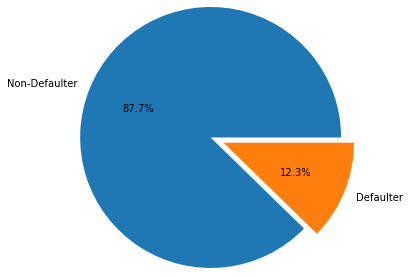

In [ ]:
rf = df.groupby('Risk_Flag')['Risk_Flag'].count()
plt.pie(rf, explode=[0.06, 0.1], labels=['Non-Defaulter', 'Defaulter'], radius=1.5, autopct='%1.1f%%')

The pie chart is used to show parts-to-whole relationship for the risk flag

In [ ]:
print(len(df.CITY.unique()))
print(len(df.STATE.unique()))
print(len(df.Profession.unique()))

317
29
51


## Data Visualization Summary
- Class 0 (Non-defaulters) represents 88& of the dataset whereas class 1 (defaulters) represent only 12% clearly showing that the classes are greatly skewed.
- There are no outliers in the dataset although Age and Income need to be scaled
- There is a strong correlation between CURRENT_JOB_YRS and Experience.

# Data Preprocessing

In [ ]:
df1 = df.copy(deep=True)
df1

,Id,Income,Age,Experience,Marital_Status,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


### Change Categorical Values to Numerical Values

In [ ]:
dummies = ['Marital_Status', 'House_Ownership', 'Car_Ownership', 'CITY', 'STATE']
dummy_df = pd.get_dummies(df1[dummies])
dummy_df

,Marital_Status_married,Marital_Status_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Car_Ownership_no,Car_Ownership_yes,CITY_Adoni,CITY_Agartala,CITY_Agra,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
251996,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251997,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251998,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1 = pd.concat([df1, dummy_df], axis=1)

##### Label Encoding For Categorical Values

In [ ]:
features = ['Marital_Status', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
label_encoder = LabelEncoder()

for col in features:
  df1[col] = label_encoder.fit_transform(df1[col])

In [ ]:
df1.drop(['Marital_Status', 'House_Ownership', 'Car_Ownership', 'Profession'], axis=1, inplace = True)
df1.head()

,Id,Income,Age,Experience,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Marital_Status_married,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
0,1,1303834,23,3,251,13,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,7574516,40,10,227,14,9,13,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3991815,66,4,8,12,4,10,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,6256451,41,2,54,17,2,12,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5768871,47,11,296,22,3,14,1,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
X = df1.drop('Risk_Flag', axis=1)
y =df1['Risk_Flag']

## Scaling

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

# Model Creation

## 1. Logistic Regression

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        pred = pred > 0.5
        print("Train Result:\n================================================")
        rmse = np.sqrt(mean_squared_error(y_train, pred))
        print("Root Mean Squared Error: {}".format(rmse))
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        
    elif train==False:
        pred = clf.predict(X_test)
        pred = pred > 0.5
        print("Test Result:\n================================================")
        rmse = np.sqrt(mean_squared_error(y_test, pred))
        print("Root Mean Squared Error: {}".format(rmse))        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
# y_predicted = model.predict(X_test)
# accuracy = model.score(X_test, y_test)
print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Root Mean Squared Error: 0.35071497268222246
Accuracy Score: 87.70%
_______________________________________________
Test Result:
Root Mean Squared Error: 0.35070790088908993
Accuracy Score: 87.70%
_______________________________________________


## 2. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

# Predict the test set results with criterion gini index
y_pred_gini = clf_gini.predict(X_test)

print_score(clf_gini, X_train, y_train, X_test, y_test, train=False)

Test Result:
Root Mean Squared Error: 0.35070790088908993
Accuracy Score: 87.70%
_______________________________________________


## 3. Backpropagation

In [ ]:
train_features = tf.convert_to_tensor(X_train, dtype=tf.float16)
train_labels = tf.convert_to_tensor(y_train, dtype=tf.float16)
test_features = tf.convert_to_tensor(X_test, dtype=tf.float16)
test_labels = tf.convert_to_tensor(y_test, dtype=tf.float16)

train_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_features, test_labels))

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 100

train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

#### Creating The Neural Network

In [ ]:
# Building the model
classifier = Sequential()
classifier.add(Dense(256, activation="relu", input_dim = 361, kernel_initializer = "uniform"))
classifier.add(Dense(128, activation="relu", kernel_initializer = "uniform"))
classifier.add(Dense(64, activation="relu", kernel_initializer = "uniform"))
classifier.add(Dense(1, activation="sigmoid", kernel_initializer = "uniform"))

# Compile the model (using Stochastic Gradient Descent)
classifier.compile(optimizer='sgd', loss="mse", metrics = ['accuracy'])

# Fitting the model
history = classifier.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=100)

# Performing prediction and rescaling
y_pred = classifier.predict(X_test.round())
y_pred = (y_pred > 0.5)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

# Visualize the model's accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
print()

Epoch 1/100
6300/6300 [==============================] - 21s 3ms/step - loss: 0.1160 - accuracy: 0.8766 - val_loss: 0.1078 - val_accuracy: 0.8770
Epoch 2/100
6300/6300 [==============================] - 19s 3ms/step - loss: 0.1076 - accuracy: 0.8770 - val_loss: 0.1075 - val_accuracy: 0.8770
Epoch 3/100
6300/6300 [==============================] - 20s 3ms/step - loss: 0.1073 - accuracy: 0.8770 - val_loss: 0.1072 - val_accuracy: 0.8770
Epoch 4/100
6300/6300 [==============================] - 23s 4ms/step - loss: 0.1069 - accuracy: 0.8770 - val_loss: 0.1068 - val_accuracy: 0.8770
Epoch 5/100
6300/6300 [==============================] - 26s 4ms/step - loss: 0.1065 - accuracy: 0.8770 - val_loss: 0.1064 - val_accuracy: 0.8770
Epoch 6/100
6300/6300 [==============================] - 20s 3ms/step - loss: 0.1060 - accuracy: 0.8770 - val_loss: 0.1060 - val_accuracy: 0.8770
Epoch 7/100
6300/6300 [==============================] - 19s 3ms/step - loss: 0.1055 - accuracy: 0.8770 - val_loss: 0.1056 -

KeyboardInterrupt: ignored